# SVM on 3rd DATASET


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords

In [2]:
email_df = pd.read_csv('3.csv')


In [3]:
email_df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
email_df['Category']=email_df.Category.apply(lambda x: 1 if x=="spam" else 0)


In [5]:
email_df.head()


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
email_df.shape


(5572, 2)

In [7]:
email_df.drop_duplicates(inplace=True)


In [8]:
email_df.shape


(5157, 2)

In [9]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lakshay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def procrss_text(text):
    nopunc = [char for char in text ]
    nopunc = ''.join(nopunc)
    
    # remove stopwords
    clean_word = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    return nopunc

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=procrss_text).fit_transform(email_df['Message'])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(messages_bow,email_df['Category'],test_size=0.20,random_state=42)

In [13]:
messages_bow.shape


(5157, 118)

In [14]:
from sklearn import svm,metrics


In [15]:
classifier = svm.SVC(kernel='linear').fit(x_train,y_train)


In [16]:
pred = classifier.predict(x_test)
print(metrics.classification_report(y_test,pred))
print(f"accuracy score = {metrics.accuracy_score(y_test,pred)}")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       896
           1       0.93      0.95      0.94       136

    accuracy                           0.98      1032
   macro avg       0.96      0.97      0.97      1032
weighted avg       0.98      0.98      0.98      1032

accuracy score = 0.9844961240310077


In [17]:
cm = metrics.confusion_matrix(y_test,pred)
tp, tn, fp, fn = cm[1,1] , cm[0,0] , cm[0,1] , cm[1,0]
print(f"True Positive {tp}")
print(f"True Negative {tn}")
print(f"False Positive {fp}")
print(f"False Positive {fn}")

True Positive 129
True Negative 887
False Positive 9
False Positive 7


In [18]:
print(f"Precision score = {metrics.precision_score(y_test,pred)}")


Precision score = 0.9347826086956522


In [19]:
print(f"Recall score = {metrics.recall_score(y_test,pred)}")


Recall score = 0.9485294117647058


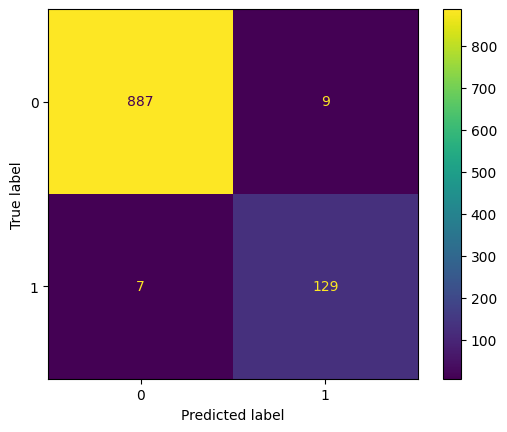

In [20]:
classes = np.unique(y_test)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes).plot()
plt.show()